<h4> I/ SIMULATION D'UN TOMOGRAPHE AXIAL (TF DE RADON)</h4>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import radon 
import cv2

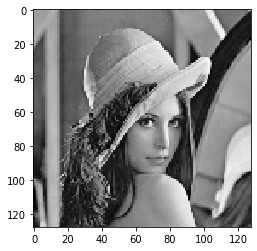

In [4]:
lenna = cv2.imread("lenna.png")
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)
lenna = cv2.resize(lenna , (128,128))
plt.imshow(lenna , cmap="gray")

<h5>Transformé de radon d'une image (projection) </h5>
<img src="2021-01-15 at 00-26-21.png"/>

<h5>Observation d'une projection de transformé de radon d'angle  90 </h5>

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  """Entry point for launching an IPython kernel.
C:\Users\DELL\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


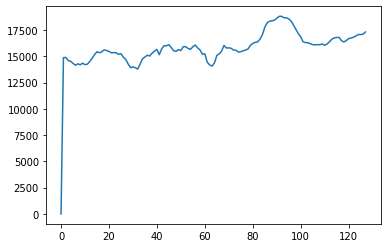

In [5]:
tr_radon = radon(lenna , theta = [90])
plt.plot(tr_radon)

<h5>Simulation ( Sinogram de Lenna )</h5>

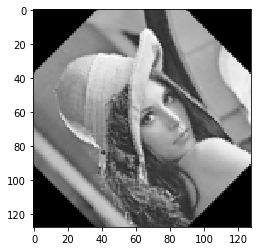

In [9]:
image_center = tuple(np.array(lenna.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, 45, 1.0)
rotated_lenna = cv2.warpAffine(lenna, rot_mat, lenna.shape[1::-1], flags=cv2.INTER_LINEAR)
plt.imshow(rotated_lenna, cmap="gray")

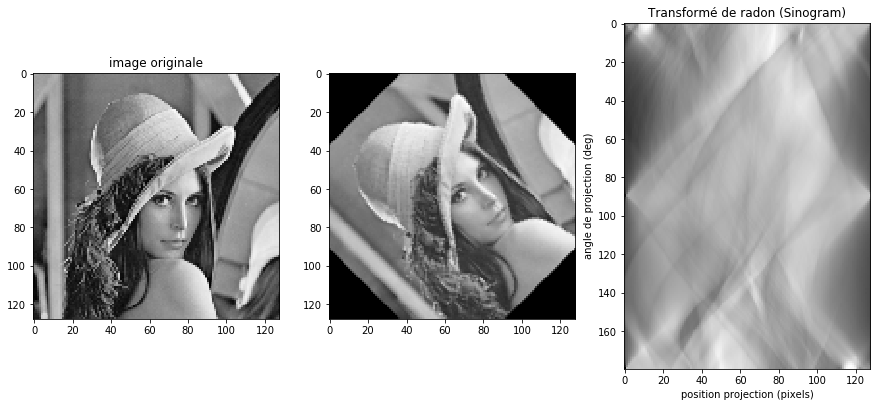

In [34]:
image_center = tuple(np.array(lenna.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, 45, 1.0)
rotated_lenna = cv2.warpAffine(lenna, rot_mat, lenna.shape[1::-1], flags=cv2.INTER_LINEAR)


theta = np.linspace(0.0,180.0, 180)
tr_radon = radon(lenna , theta = theta, preserve_range=True, circle=True )

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(131)
ax1.set_title('image originale')
ax1.imshow(lenna, cmap='gray')

ax2 = fig.add_subplot(132)
ax2.imshow(rotated_lenna, cmap="gray")

ax3 = fig.add_subplot(133)
ax3.set_title('Transformé de radon (Sinogram)')
ax3.imshow(tr_radon.T, cmap='gray')
ax3.set_xlabel("position projection (pixels)")
ax3.set_ylabel("angle de projection (deg)")

plt.show()

<h4>II/ RECONSTRUCTION TOMOGRAPHIQUE (TF−1 DE RADON)</h4>

1) reconstruction (rétroprojection sans filtrage) 

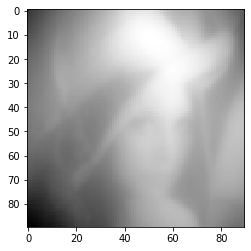

In [32]:
from skimage.transform import iradon

theta = np.linspace(0.0,180.0, 180)
reconstruction = iradon(tr_radon, theta=theta ,filter_name=None,circle=False)
plt.imshow(reconstruction, cmap="gray")

<strong>Remarque: </strong>
<li>image floue</li>
<li>faible qualité</li>
<li>ce n'est pas vraiment l'inverse de l'operateur Radon qu'on cherche</li>
</br>
<strong>Problème: </strong>
<p>à partir de théoreme de tranche centrale de fourier, en remarque qu'il y a un problème de suréchantillonnage de milieu de TFF-2D(TFR-1D) provenant de chevauchement dans le domaine fréquentiel ( Over sampling in the middle ) </p></br>
<strong>Solution: </strong>
<li> rétroprojetion filtrée</li>
<li>appliquer un filtre qui permet de minimiser ou d'éliminer le role de milieu de TFF-2D(TFR-1D) puis calculer TFF-1 et enfin faire la recontruction </li>

<img src="2021-01-15 at 02-01-33.png"/>

1) rétroprojetion filtrée

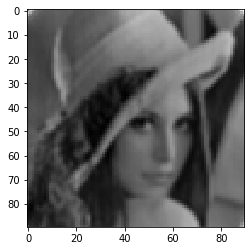

In [29]:
reconstruction_180_ramp = iradon(tr_radon, theta=theta ,filter_name="ramp",circle=False)
plt.imshow(reconstruction, cmap="gray")

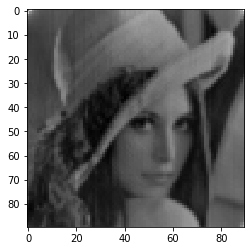

In [25]:
reconstruction = iradon(tr_radon, theta=theta ,filter_name="shepp-logan",circle=False)
plt.imshow(reconstruction, cmap="gray")

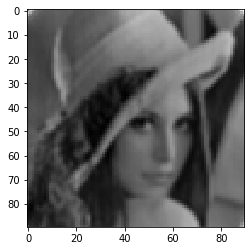

In [28]:
reconstruction = iradon(tr_radon, theta=theta ,filter_name="cosine",circle=False)
plt.imshow(reconstruction, cmap="gray")

2) comparer les resultats en utilisant differents nombre de projection

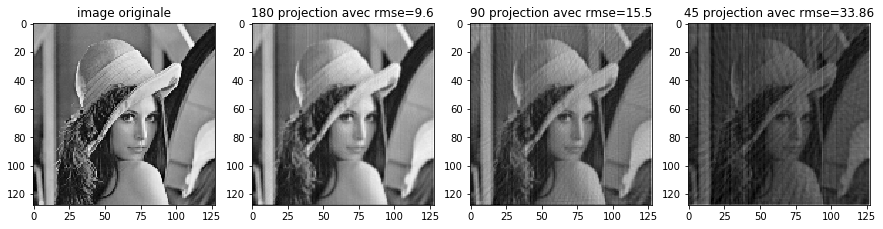

In [40]:
theta = np.linspace(0.0,180.0, 180)
tr_radon = radon(lenna , theta = theta, preserve_range=True, circle=False )
reconstruction_180_ramp = iradon(tr_radon, theta=theta ,filter_name="ramp",circle=False)

theta_90 = np.linspace(0.0,180.0, 90)
theta_45 = np.linspace(0.0,180.0, 45)
tr_radon_90 = radon(lenna , theta = theta_90, preserve_range=True,circle=False )
tr_radon_45 = radon(lenna , theta = theta_45, preserve_range=True,circle=False )

reconstruction_90_ramp = iradon(tr_radon_90, theta=theta_90 ,filter_name="ramp",circle=False)
reconstruction_45_ramp = iradon(tr_radon_45, theta=theta_45 ,filter_name="ramp",circle=False)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(141)
ax1.set_title('image originale')
ax1.imshow(lenna, cmap='gray')


ax2 = fig.add_subplot(142)
rms1 = np.sqrt(np.mean((reconstruction_180_ramp - lenna)**2)) 
ax2.set_title(f'180 projection avec rmse={round(rms1,2)}')
ax2.imshow(reconstruction_180_ramp, cmap='gray')

ax2 = fig.add_subplot(143)
rms2 = np.sqrt(np.mean((reconstruction_90_ramp - lenna)**2)) 
ax2.set_title(f'90 projection avec rmse={round(rms2,2)}')
ax2.imshow(reconstruction_90_ramp, cmap='gray')


ax2 = fig.add_subplot(144)
rms3 = np.sqrt(np.mean((reconstruction_45_ramp - lenna)**2)) 
ax2.set_title(f'45 projection avec rmse={round(rms3,2)}')
ax2.imshow(reconstruction_45_ramp, cmap='gray')


plt.show()